In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("day.csv", index_col = 0)

In [4]:
df.head()

dteday  season  yr  mnth  holiday  weekday  workingday  \
instant                                                               
1        01-01-2018       1   0     1        0        1           1   
2        02-01-2018       1   0     1        0        2           1   
3        03-01-2018       1   0     1        0        3           1   
4        04-01-2018       1   0     1        0        4           1   
5        05-01-2018       1   0     1        0        5           1   

         weathersit       temp     atemp      hum  windspeed  casual  \
instant                                                                
1                 2  14.110847  18.18125  80.5833  10.749882     331   
2                 2  14.902598  17.68695  69.6087  16.652113     131   
3                 1   8.050924   9.47025  43.7273  16.636703     120   
4                 1   8.200000  10.60610  59.0435  10.739832     108   
5                 1   9.305237  11.46350  43.6957  12.522300      82   

         registered   cnt  
instant                    
1               654   985  
2               670   801  
3              1229  1349  
4              1454  1562  
5              1518  1600

In [5]:
df.shape

(730, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


Converting categorical data that's been given as int/float type into str;so that they are not considered as numerical variables

In [7]:
df['dteday'] = df['dteday'].astype('datetime64')

In [8]:
def obj_map(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

df[['mnth']] = df[['mnth']].apply(obj_map) 

In [9]:
def ass_season(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
    
df['season'] = df['season'].apply(ass_season)

In [10]:
def ass_yr(x):
    if x==0:
        return '2018'
    elif x==1:
        return '2019'
        
df['yr'] = df['yr'].apply(ass_yr)

In [11]:
def ass_holiday(x):
    if x==0:
        return 'No'
    elif x==1:
        return 'Yes'
        
df['holiday'] = df['holiday'].apply(ass_holiday)

In [12]:
def ass_workingday(x):
    if x==0:
        return 'No'
    elif x==1:
        return 'Yes'
        
df['workingday'] = df['workingday'].apply(ass_workingday)

In [13]:
def ass_weathersit(x):
    if x==1:
        return 'clear'
    elif x==2:
        return 'misty'
    elif x==3:
        return 'light_fall'
    else:
        return 'heavy_fall'
    
df['weathersit'] = df['weathersit'].apply(ass_weathersit)


In [14]:
def obj_map2(x):
    return x.map({1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat',0:'Sun'})

df[['weekday']] = df[['weekday']].apply(obj_map2) 

In [15]:
#df.head()
#df.yr.value_counts()
#df.mnth.value_counts()
#df.season.value_counts()
#df.holiday.value_counts()
#df.workingday.value_counts()
#df.weathersit.value_counts()
#df.weekday.value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 91.2+ 

In [16]:
# categorical data are Object types

df_categorical = df.select_dtypes(exclude=['float64','datetime64','int64'])
df_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

### Visualising Categorical data

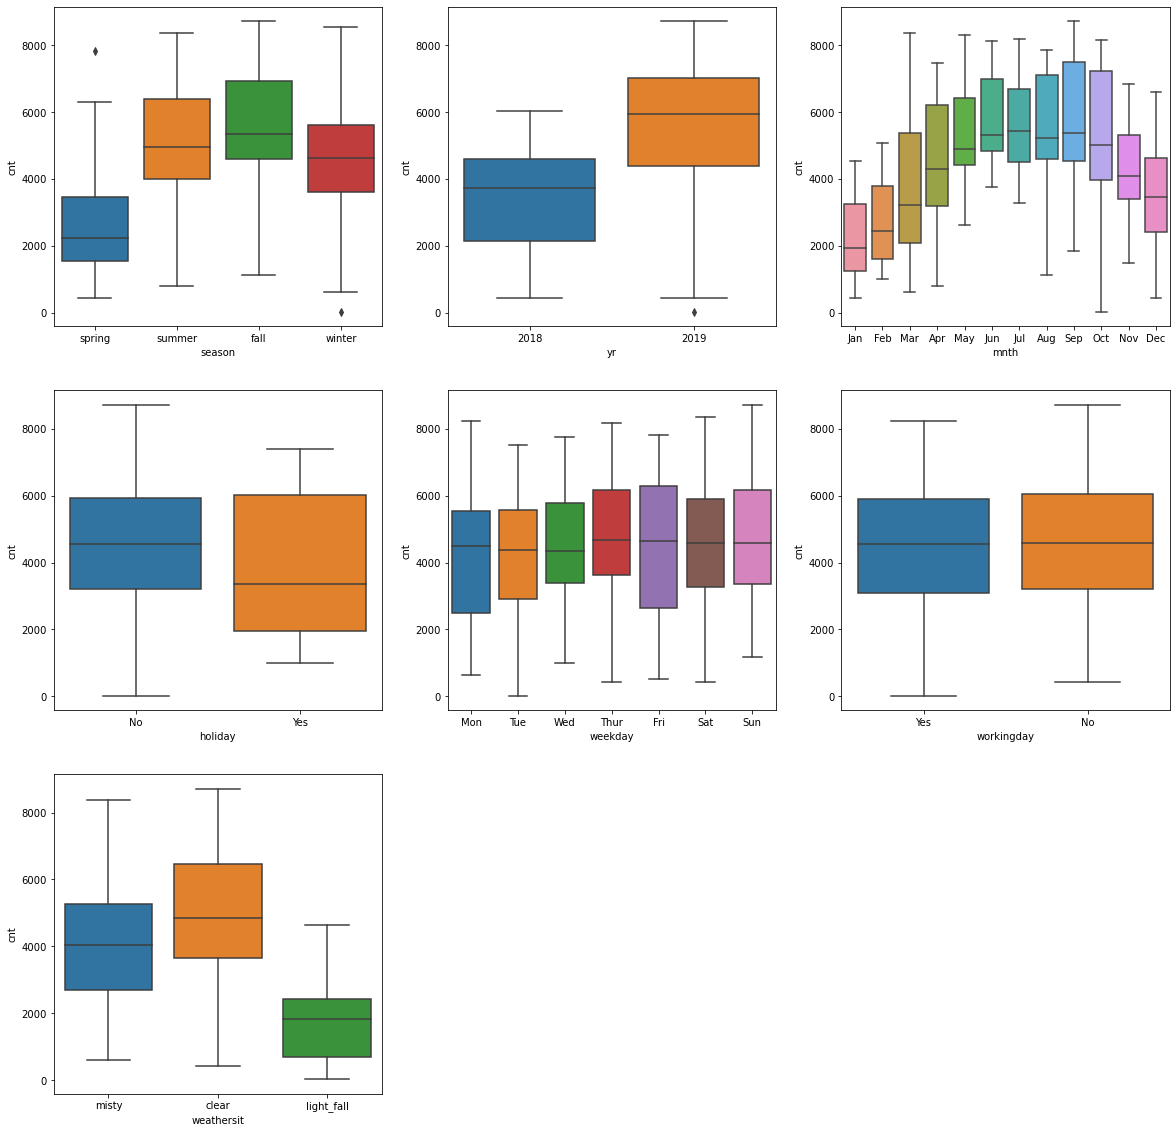

In [17]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season',y='cnt',data=df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr',y='cnt',data=df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth',y='cnt',data=df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday',y='cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday',y='cnt',data=df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday',y='cnt',data=df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit',y='cnt',data=df)
plt.show()

### Observations

1. Spring has the lowest cnt
2. cnt is highly dep on weathersit (people don't prefer biking in light rain)
3. cnt is also independent of workingday & weekdays.
4. on holidays cnt is low.(i.e people prefer biking on workingdays)
5. there is significant rise in cnt in 2019 as compared to 2018.

In [18]:
#Seperating coulumns with numerical data

df_num = df.select_dtypes(exclude=['datetime64','object'])
df_num.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [19]:
for var in df_num:
    df[var] = df[var].astype('float')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    float64       
 13  registered  730 non-null    float64       
 14  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(7)
memory usage: 111.2+ KB


### Visualisation of numerical data

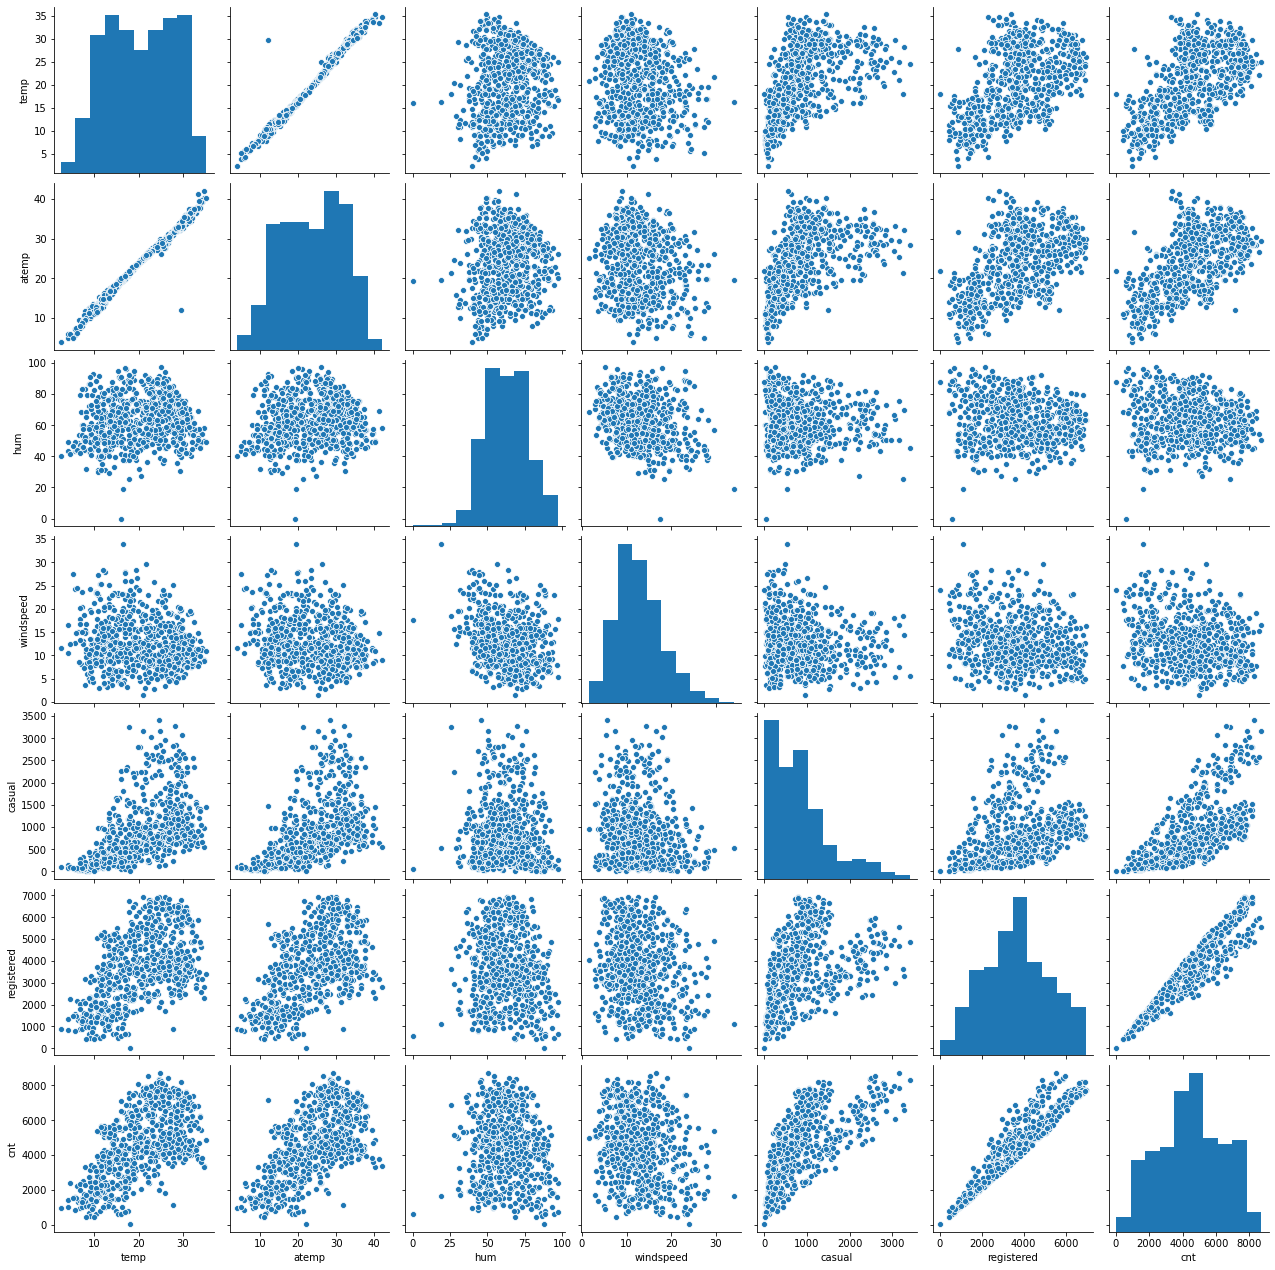

In [21]:
sns.pairplot(df[['temp', 'atemp', 'hum', 'windspeed',  'casual','registered','cnt']])
plt.show();

### Observations

1. temp is positively related to the cnt
2. windspeed is negatively related to cnt
3. humidity is not specifically related but people don't prefer biking when humidity is very low.

In [22]:
corr= df_num.corr()
corr

temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991696  0.128565  -0.158186  0.542731    0.539436   
atemp       0.991696  1.000000  0.141512  -0.183876  0.543362    0.543678   
hum         0.128565  0.141512  1.000000  -0.248506 -0.075211   -0.089212   
windspeed  -0.158186 -0.183876 -0.248506   1.000000 -0.167995   -0.217914   
casual      0.542731  0.543362 -0.075211  -0.167995  1.000000    0.394137   
registered  0.539436  0.543678 -0.089212  -0.217914  0.394137    1.000000   
cnt         0.627044  0.630685 -0.098543  -0.235132  0.672123    0.945411   

                 cnt  
temp        0.627044  
atemp       0.630685  
hum        -0.098543  
windspeed  -0.235132  
casual      0.672123  
registered  0.945411  
cnt         1.000000

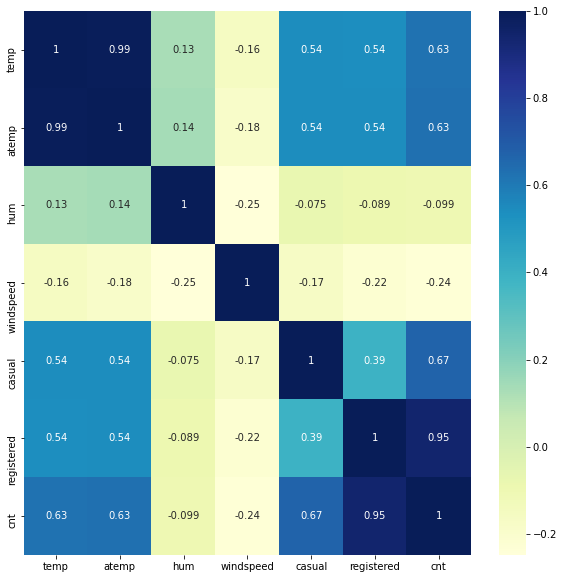

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

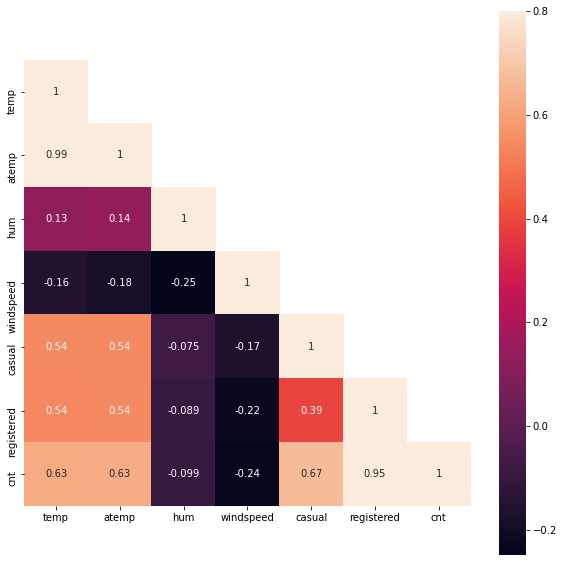

In [24]:
#Masking 

mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr,mask=mask,vmax=0.8,square=True,annot=True);

### Observation

1. Cnt and windspeedare negative related
2. Cnt is significantly related to temp
    - atemp and temp are highly corelated

In [25]:
# Therefore dropping atemp
df.drop(['atemp'], axis = 1, inplace = True)

### Data preperation

In [26]:
df_dummies = pd.get_dummies(df_categorical,drop_first=True)
df_dummies.head()

season_spring  season_summer  season_winter  yr_2019  mnth_Aug  \
instant                                                                   
1                    1              0              0        0         0   
2                    1              0              0        0         0   
3                    1              0              0        0         0   
4                    1              0              0        0         0   
5                    1              0              0        0         0   

         mnth_Dec  mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  ...  holiday_Yes  \
instant                                                    ...                
1               0         0         1         0         0  ...            0   
2               0         0         1         0         0  ...            0   
3               0         0         1         0         0  ...            0   
4               0         0         1         0         0  ...            0   
5               0         0         1         0         0  ...            0   

         weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thur  weekday_Tue  \
instant                                                                     
1                  1            0            0             0            0   
2                  0            0            0             0            1   
3                  0            0            0             0            0   
4                  0            0            0             1            0   
5                  0            0            0             0            0   

         weekday_Wed  workingday_Yes  weathersit_light_fall  weathersit_misty  
instant                                                                        
1                  0               1                      0                 1  
2                  0               1                      0                 1  
3                  1               1                      0                 0  
4                  0               1                      0                 0  
5                  0               1                      0                 0  

[5 rows x 25 columns]

In [27]:
list(df_categorical.columns)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [28]:
df = df.drop(df_categorical.columns,axis=1)

df.columns

Index(['dteday', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [29]:
df = pd.concat([df,df_dummies], axis=1)

In [30]:
df.head()

dteday       temp      hum  windspeed  casual  registered     cnt  \
instant                                                                         
1       2018-01-01  14.110847  80.5833  10.749882   331.0       654.0   985.0   
2       2018-02-01  14.902598  69.6087  16.652113   131.0       670.0   801.0   
3       2018-03-01   8.050924  43.7273  16.636703   120.0      1229.0  1349.0   
4       2018-04-01   8.200000  59.0435  10.739832   108.0      1454.0  1562.0   
5       2018-05-01   9.305237  43.6957  12.522300    82.0      1518.0  1600.0   

         season_spring  season_summer  season_winter  ...  holiday_Yes  \
instant                                               ...                
1                    1              0              0  ...            0   
2                    1              0              0  ...            0   
3                    1              0              0  ...            0   
4                    1              0              0  ...            0   
5                    1              0              0  ...            0   

         weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thur  weekday_Tue  \
instant                                                                     
1                  1            0            0             0            0   
2                  0            0            0             0            1   
3                  0            0            0             0            0   
4                  0            0            0             1            0   
5                  0            0            0             0            0   

         weekday_Wed  workingday_Yes  weathersit_light_fall  weathersit_misty  
instant                                                                        
1                  0               1                      0                 1  
2                  0               1                      0                 1  
3                  1               1                      0                 0  
4                  0               1                      0                 0  
5                  0               1                      0                 0  

[5 rows x 32 columns]

In [31]:
df = df.drop(['casual','registered','dteday'],axis=1)

### Splitting

In [32]:
import statsmodels
import statsmodels.api as sm
import sklearn

In [33]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
y_train = df_train.pop('cnt')
X_train = df_train

# Model 1

In [37]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','windspeed','yr_2019']])

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     416.0
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          3.84e-136
Time:                        23:21:06   Log-Likelihood:                 355.52
No. Observations:                 510   AIC:                            -703.0
Df Residuals:                     506   BIC:                            -686.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1570      0.019      8.177      0.000       0.119       0.195
temp           0.5556      0.024     22.847      0.000       0.508       0.603
windspeed     -0.1964      0.032     -6.109      0.000      -0.260      -0.133
yr_2019        0.2385      0.011     22.124      0.000       0.217       0.260
==============================================================================
Omnibus:                       23.079   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.405
Skew:                          -0.433   Prob(JB):                     6.79e-07
Kurtosis:                       3.767   Cond. No.                         8.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 2

In [38]:
df.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'holiday_Yes', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thur', 'weekday_Tue', 'weekday_Wed',
       'workingday_Yes', 'weathersit_light_fall', 'weathersit_misty'],
      dtype='object')

In [39]:
# With all variables at once

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm.astype(float)).fit()


In [40]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          4.33e-179
Time:                        23:21:07   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.39

### checking VIF

In [41]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
25         workingday_Yes  63.89
0                    temp  43.99
1                     hum  41.17
3           season_spring  13.54
5           season_winter  12.51
21            weekday_Sun  12.35
20            weekday_Sat  11.83
4           season_summer   9.84
15               mnth_Nov   7.16
16               mnth_Oct   6.96
7                mnth_Aug   6.86
10               mnth_Jan   6.09
11               mnth_Jul   5.97
8                mnth_Dec   5.78
2               windspeed   5.59
17               mnth_Sep   5.06
9                mnth_Feb   4.50
13               mnth_Mar   3.72
12               mnth_Jun   3.04
18            holiday_Yes   2.82
14               mnth_May   2.43
27       weathersit_misty   2.43
6                 yr_2019   2.14
19            weekday_Mon   2.09
23            weekday_Tue   2.09
22           weekday_Thur   2.04
24            weekday_Wed   1.98
26  weathersit_light_fall   1.33

In [43]:
X = X_train.drop('workingday_Yes', 1)
X = X.drop('hum', 1)
X = X.drop('temp', 1)
X = X.drop('season_winter', 1)
X = X.drop('season_spring', 1)

In [44]:
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [45]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     89.65
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          1.85e-158
Time:                        23:21:08   Log-Likelihood:                 461.00
No. Observations:                 510   AIC:                            -874.0
Df Residuals:                     486   BIC:                            -772.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4615      0.032     14.323      0.000       0.398       0.525
windspeed                -0.1848      0.028     -6.624      0.000      -0.240      -0.130
season_summer             0.0461      0.022      2.062      0.040       0.002       0.090
yr_2019                   0.2475      0.009     27.609      0.000       0.230       0.265
mnth_Aug                  0.1476      0.031      4.713      0.000       0.086       0.209
mnth_Dec                 -0.0612      0.032     -1.928      0.054      -0.124       0.001
mnth_Feb                 -0.1684      0.032     -5.195      0.000      -0.232      -0.105
mnth_Jan                 -0.2312      0.031     -7.347      0.000      -0.293      -0.169
mnth_Jul                  0.1208      0.032      3.763      0.000       0.058       0.184
mnth_Jun                  0.1207      0.025      4.923      0.000       0.073       0.169
mnth_Mar                 -0.0630      0.026     -2.451      0.015      -0.114      -0.013
mnth_May                  0.0750      0.022      3.343      0.001       0.031       0.119
mnth_Nov                  0.0164      0.032      0.521      0.602      -0.046       0.078
mnth_Oct                  0.1165      0.032      3.670      0.000       0.054       0.179
mnth_Sep                  0.1842      0.032      5.741      0.000       0.121       0.247
holiday_Yes              -0.0814      0.029     -2.772      0.006      -0.139      -0.024
weekday_Mon              -0.0347      0.016     -2.123      0.034      -0.067      -0.003
weekday_Sat               0.0050      0.017      0.294      0.769      -0.028       0.038
weekday_Sun               0.0115      0.017      0.684      0.494      -0.022       0.045
weekday_Thur              0.0090      0.017      0.537      0.591      -0.024       0.042
weekday_Tue              -0.0267      0.016     -1.622      0.105      -0.059       0.006
weekday_Wed              -0.0116      0.017     -0.680      0.497      -0.045       0.022
weathersit_light_fall    -0.2951      0.027    -10.759      0.000      -0.349      -0.241
weathersit_misty         -0.0857      0.010     -8.839      0.000      -0.105      -0.067
==============================================================================
Omnibus:                       76.611   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.261
Skew:                          -0.715   Prob(JB):                     3.31e-49
Kurtosis:                       5.909   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0               windspeed  4.46
1           season_summer  3.36
2                 yr_2019  2.01
15            weekday_Mon  1.96
19            weekday_Tue  1.96
18           weekday_Thur  1.92
20            weekday_Wed  1.88
17            weekday_Sun  1.87
12               mnth_Oct  1.84
6                mnth_Jan  1.78
16            weekday_Sat  1.78
3                mnth_Aug  1.77
10               mnth_May  1.77
11               mnth_Nov  1.74
5                mnth_Feb  1.68
7                mnth_Jul  1.65
4                mnth_Dec  1.64
22       weathersit_misty  1.63
13               mnth_Sep  1.62
9                mnth_Mar  1.62
8                mnth_Jun  1.37
21  weathersit_light_fall  1.12
14            holiday_Yes  1.11

# REF- model 3

In [47]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [48]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 14),
 ('mnth_Dec', False, 6),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 18),
 ('mnth_Mar', False, 19),
 ('mnth_May', False, 11),
 ('mnth_Nov', False, 5),
 ('mnth_Oct', False, 16),
 ('mnth_Sep', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', False, 13),
 ('weekday_Sat', False, 9),
 ('weekday_Sun', False, 10),
 ('weekday_Thur', False, 17),
 ('weekday_Tue', False, 12),
 ('weekday_Wed', False, 15),
 ('workingday_Yes', False, 8),
 ('weathersit_light_fall', True, 1),
 ('weathersit_misty', False, 2)]

In [50]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'yr_2019',
       'mnth_Jul', 'mnth_Sep', 'holiday_Yes', 'weathersit_light_fall'],
      dtype='object')

In [51]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed', 'workingday_Yes', 'weathersit_misty'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [52]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_lm = X_train_rfe

In [53]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [54]:
X_train_rfe

const      temp       hum  windspeed  season_spring  season_winter  \
instant                                                                       
654        1.0  0.509887  0.575354   0.300794              0              1   
577        1.0  0.815169  0.725633   0.264686              0              0   
427        1.0  0.442393  0.640189   0.255342              1              0   
729        1.0  0.245101  0.498067   0.663106              1              0   
483        1.0  0.395666  0.504508   0.188475              0              0   
...        ...       ...       ...        ...            ...            ...   
527        1.0  0.824514  0.605840   0.355596              0              0   
579        1.0  0.863973  0.679690   0.187140              0              0   
54         1.0  0.202618  0.435939   0.111379              1              0   
351        1.0  0.248216  0.577930   0.431816              0              1   
80         1.0  0.462664  0.759870   0.529881              0              0   

         yr_2019  mnth_Jul  mnth_Sep  holiday_Yes  weathersit_light_fall  
instant                                                                   
654            1         0         0            0                      0  
577            1         1         0            0                      0  
427            1         0         0            0                      0  
729            1         0         0            0                      0  
483            1         0         0            0                      0  
...          ...       ...       ...          ...                    ...  
527            1         0         0            0                      0  
579            1         0         0            0                      0  
54             0         0         0            0                      0  
351            0         0         0            0                      0  
80             0         0         0            0                      0  

[510 rows x 11 columns]

In [55]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [56]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          1.53e-184
Time:                        23:21:11   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

In [57]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                   const  56.13
1                    temp   2.87
4           season_spring   2.53
5           season_winter   1.75
7                mnth_Jul   1.29
2                     hum   1.26
3               windspeed   1.15
8                mnth_Sep   1.11
10  weathersit_light_fall   1.11
6                 yr_2019   1.03
9             holiday_Yes   1.01

In [58]:
lm.params

const                    0.376946
temp                     0.514674
hum                     -0.272807
windspeed               -0.188675
season_spring           -0.100531
season_winter            0.065282
yr_2019                  0.228051
mnth_Jul                -0.080549
mnth_Sep                 0.059762
holiday_Yes             -0.092000
weathersit_light_fall   -0.197972
dtype: float64

# Model Analysis

### Residual Analysis

In [59]:
y_train_cnt = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

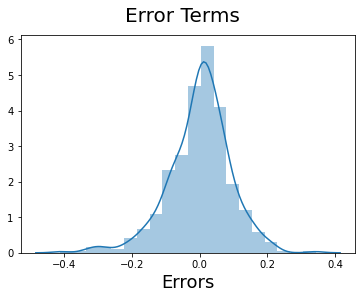

In [60]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Predictions

In [61]:
num_vars

['temp', 'hum', 'windspeed', 'cnt']

In [62]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [63]:
df_test.describe()

temp         hum   windspeed         cnt  season_spring  \
count  219.000000  219.000000  219.000000  219.000000     219.000000   
mean     0.558941    0.638508    0.313350    0.520592       0.255708   
std      0.233698    0.148974    0.159947    0.218435       0.437258   
min      0.046591    0.261915   -0.042808    0.048205       0.000000   
25%      0.354650    0.527265    0.198517    0.377531       0.000000   
50%      0.558691    0.627737    0.299459    0.524275       0.000000   
75%      0.759096    0.743928    0.403048    0.672745       1.000000   
max      0.984424    1.002146    0.807474    0.963300       1.000000   

       season_summer  season_winter     yr_2019    mnth_Aug    mnth_Dec  ...  \
count     219.000000     219.000000  219.000000  219.000000  219.000000  ...   
mean        0.264840       0.232877    0.479452    0.059361    0.086758  ...   
std         0.442259       0.423633    0.500722    0.236840    0.282125  ...   
min         0.000000       0.000000    0.000000    0.000000    0.000000  ...   
25%         0.000000       0.000000    0.000000    0.000000    0.000000  ...   
50%         0.000000       0.000000    0.000000    0.000000    0.000000  ...   
75%         1.000000       0.000000    1.000000    0.000000    0.000000  ...   
max         1.000000       1.000000    1.000000    1.000000    1.000000  ...   

       holiday_Yes  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thur  \
count   219.000000   219.000000   219.000000   219.000000    219.000000   
mean      0.036530     0.118721     0.173516     0.155251      0.141553   
std       0.188034     0.324202     0.379560     0.362974      0.349389   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     0.000000     0.000000      0.000000   
50%       0.000000     0.000000     0.000000     0.000000      0.000000   
75%       0.000000     0.000000     0.000000     0.000000      0.000000   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

       weekday_Tue  weekday_Wed  workingday_Yes  weathersit_light_fall  \
count   219.000000   219.000000      219.000000             219.000000   
mean      0.123288     0.155251        0.639269               0.027397   
std       0.329520     0.362974        0.481313               0.163612   
min       0.000000     0.000000        0.000000               0.000000   
25%       0.000000     0.000000        0.000000               0.000000   
50%       0.000000     0.000000        1.000000               0.000000   
75%       0.000000     0.000000        1.000000               0.000000   
max       1.000000     1.000000        1.000000               1.000000   

       weathersit_misty  
count        219.000000  
mean           0.319635  
std            0.467403  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            1.000000  
max            1.000000  

[8 rows x 29 columns]

In [64]:
# Test case:- 

y_test = df_test.pop('cnt')
X_test = df_test

In [65]:
X_train_rfe

const      temp       hum  windspeed  season_spring  season_winter  \
instant                                                                       
654        1.0  0.509887  0.575354   0.300794              0              1   
577        1.0  0.815169  0.725633   0.264686              0              0   
427        1.0  0.442393  0.640189   0.255342              1              0   
729        1.0  0.245101  0.498067   0.663106              1              0   
483        1.0  0.395666  0.504508   0.188475              0              0   
...        ...       ...       ...        ...            ...            ...   
527        1.0  0.824514  0.605840   0.355596              0              0   
579        1.0  0.863973  0.679690   0.187140              0              0   
54         1.0  0.202618  0.435939   0.111379              1              0   
351        1.0  0.248216  0.577930   0.431816              0              1   
80         1.0  0.462664  0.759870   0.529881              0              0   

         yr_2019  mnth_Jul  mnth_Sep  holiday_Yes  weathersit_light_fall  
instant                                                                   
654            1         0         0            0                      0  
577            1         1         0            0                      0  
427            1         0         0            0                      0  
729            1         0         0            0                      0  
483            1         0         0            0                      0  
...          ...       ...       ...          ...                    ...  
527            1         0         0            0                      0  
579            1         0         0            0                      0  
54             0         0         0            0                      0  
351            0         0         0            0                      0  
80             0         0         0            0                      0  

[510 rows x 11 columns]

In [66]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [67]:
y_pred_rfe = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

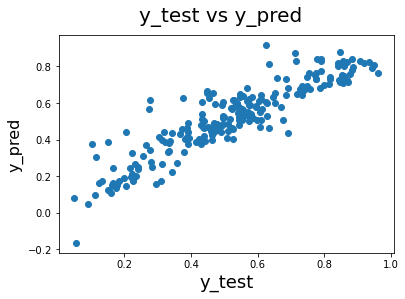

In [68]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_rfe)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_rfe)

0.8177513196533346

In [70]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [71]:
rmse = sqrt(mean_squared_error(y_test, y_pred_rfe))
rmse

0.09303788667735063